# Student Intervention

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import seaborn as sns

In [10]:
student=pd.read_csv("student-data.csv")
student.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes


## Implementation:Data Exploration

In [73]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

the number of students 395
the number of features 30
the number of students passed the exam 265
the number of students failed the exam 130
the graduation rate 67.09%


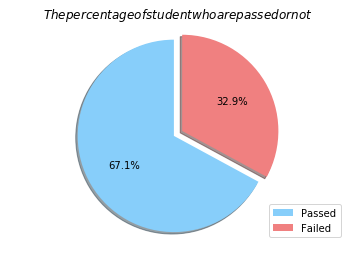

In [72]:
numPass=np.sum(student['passed']=='yes')
numFail=np.sum(student['passed']=='no')
sizePassed=[numPass,numFail]
labels=['Passed','Failed']
colors=['lightskyblue','lightcoral']
explode=[0.1,0]
plt.pie(sizePassed,colors=colors,autopct="%1.1f%%",explode=explode,startangle=90,shadow=True)
plt.legend(labels)
plt.axis('equal')
plt.title("$The percentage of student who are passed or not$")

print("the number of students {}".format(len(student)))
print("the number of features {}".format(student.shape[1]-1))
print("the number of students passed the exam {}".format(numPass))
print("the number of students failed the exam {}".format(numFail))
print("the graduation rate {:.2f}%".format(numPass/len(student)*100))

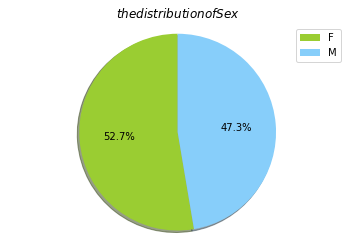

In [74]:
# the distribution of gender
%matplotlib inline
sizeSex=[np.sum(student['sex']=='F'),np.sum(student['sex']=='M')]
explode=[0.0,0.1]
colors=['yellowgreen','lightskyblue','gold','lightcoral']
labels=['F','M']
plt.pie(sizeSex,colors=colors,autopct='%1.1f%%',startangle=90,shadow=True)
plt.legend(labels)
plt.axis('equal')
plt.title("$the distribution of Sex$")

In [91]:
# to separate the student data into featureset and targetset
feature_cols=student.iloc[:,:-1].copy()
target_col=student.iloc[:,-1].copy()

In [110]:
def featureTransforms(X):
    '''Preprocesses the student data and converts non-numeric binary variables into 
       binary (0/1) variables.Converts categorical variables into dummy variables'''
    
    # Initialize a dataFrame
    output=pd.DataFrame(index=X.index)
    for col,colData in X.iteritems():
        if colData.dtype==object:
            colData=colData.replace(['yes','no'],[1,0])
        if colData.dtype==object:
            colData=pd.get_dummies(colData,prefix=col)
            
        output=output.join(colData)
    return output
output=featureTransforms(feature_cols)

In [117]:
# Training and testing dataset split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(output,target_col,test_size=95,random_state=42)

print("The training set has {} samples".format(len(X_train)))
print("The testing set has {} samples".format(len(X_test)))

The training set has 300 samples
The testing set has 95 samples


# Training and Evaluation Models

In [133]:
# setup three methods :
# --(1) train_Classifier(clf,X,y)
#       return none
# --(2) predict_labels(clf,X,y)
#       return f1_score
# --(3) train_predict(clf,X,y)
#       the combination of train_Classifier and predict_labels
from sklearn.metrics import f1_score

def train_classifier(clf,X,y):
    start=time()
    clf.fit(X,y)
    end=time()
    print("The model was trained in {:.4f} seconds".format(end-start))
    

def predict_label(clf,X,y_true):
    start=time()
    y_pred=clf.predict(X)
    end=time()
    print("the model makes a prediction in {:.4f} seconds".format(end-start))
    return f1_score(y_true,y_pred,pos_label='yes')

def train_predict(clf,X_train,y_true,X_test,y_test):
    print("Training the classifier using the classifier of {} and based on the dataset of {} ".format(clf.__class__.__name__,len(X_train)))
    
    train_classifier(clf,X_train,y_true)
    
    print("the f1_score of training set is {:.4f}".format(predict_label(clf,X_train,y_true)))
    print("the f1_score of testing set is {:.4f}".format(predict_label(clf,X_test,y_test)))
    

# Build the Classifier models

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

clf_A=DecisionTreeClassifier(random_state=35)
clf_B=SVC(random_state=35)
clf_C=RandomForestClassifier(random_state=35)

#split the training dataset into three different size
X_train_300=X_train
y_train_300=y_train

X_train_100=X_train[:100]
y_train_100=y_train[:100]

X_train_200=X_train[:200]
y_train_200=y_train[:200]

for clf in [clf_A,clf_B,clf_C]:
    for train in [(X_train_100,y_train_100),(X_train_200,y_train_200),(X_train_300,y_train_300)]:
        train_predict(clf,train[0],train[1],X_test,y_test)
        print()      

Training the classifier using the classifier of DecisionTreeClassifier and based on the dataset of 100 
The model was trained in 0.0020 seconds
the model makes a prediction in 0.0010 seconds
the f1_score of training set is 1.0000
the model makes a prediction in 0.0010 seconds
the f1_score of testing set is 0.6387

Training the classifier using the classifier of DecisionTreeClassifier and based on the dataset of 200 
The model was trained in 0.0020 seconds
the model makes a prediction in 0.0010 seconds
the f1_score of training set is 1.0000
the model makes a prediction in 0.0010 seconds
the f1_score of testing set is 0.7231

Training the classifier using the classifier of DecisionTreeClassifier and based on the dataset of 300 
The model was trained in 0.0020 seconds
the model makes a prediction in 0.0000 seconds
the f1_score of training set is 1.0000
the model makes a prediction in 0.0000 seconds
the f1_score of testing set is 0.6281

Training the classifier using the classifier of SVC 

# Choosing the Best Model

In [136]:
# the implementation of Model Tuning --Select the svm as the best estimator
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

parameters={"C":[0.01,0.1,1.0,10.0,100.0],
            "kernel":['rbf','linear','poly','sigmoid']}

clf=SVC(random_state=35)

f1_scorer=make_scorer(f1_score,pos_label='yes')

grid_clf=GridSearchCV(clf,parameters,scoring=f1_scorer)
grid_clf.fit(X_train,y_train)

best_clf=grid_clf.best_estimator_

print('the f1_score on the training dataset of the tuned model {:.3f}'.format(predict_label(best_clf,X_train,y_train)))
print('the f1_score on the testing dataset of the tuned model {:.3f}'.format(predict_label(best_clf,X_test,y_test)))

the model makes a prediction in 0.0030 seconds
the f1_score on the training dataset of the tuned model 0.862
the model makes a prediction in 0.0010 seconds
the f1_score on the testing dataset of the tuned model 0.789


In [137]:
grid_clf.best_params_

{'C': 0.01, 'kernel': 'poly'}